In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
# https://www.kaggle.com/rohanrao/air-quality-data-in-india?select=city_day.csv
data = pd.read_csv("data/india/city_day.csv")  #local.
#!curl https://raw.githubusercontent.com/karthikeyanrathore/AQI/main/data/india/city_day.csv?token=GHSAT0AAAAAABTNEQV2U2F42YYZOVLV3ETIYSZM2EA > city_day.csv
#data = pd.read_csv("/content/city_day.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [2]:
len(data['City'].unique()) # 26 citites
list(data['City'].unique())

['Ahmedabad',
 'Aizawl',
 'Amaravati',
 'Amritsar',
 'Bengaluru',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jaipur',
 'Jorapokhar',
 'Kochi',
 'Kolkata',
 'Lucknow',
 'Mumbai',
 'Patna',
 'Shillong',
 'Talcher',
 'Thiruvananthapuram',
 'Visakhapatnam']

In [3]:
#del data['PM10']
#del data['AQI']
del data['AQI_Bucket']
# why - https://smartairfilters.com/en/blog/difference-pm2-5-aqi-measurements/

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     29531 non-null  object        
 1   Date     29531 non-null  datetime64[ns]
 2   PM2.5    24933 non-null  float64       
 3   PM10     18391 non-null  float64       
 4   NO       25949 non-null  float64       
 5   NO2      25946 non-null  float64       
 6   NOx      25346 non-null  float64       
 7   NH3      19203 non-null  float64       
 8   CO       27472 non-null  float64       
 9   SO2      25677 non-null  float64       
 10  O3       25509 non-null  float64       
 11  Benzene  23908 non-null  float64       
 12  Toluene  21490 non-null  float64       
 13  Xylene   11422 non-null  float64       
 14  AQI      24850 non-null  float64       
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 3.4+ MB


In [6]:
# worst polluted city? before covid 
# Ahmedabad
poll_city = data[data['AQI'] == 2049].dropna()
poll_city

# worst polluted city? after covid 
# Ahmedabad
poll_city = data[data['AQI'] == 1291].dropna()
poll_city

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI


In [7]:
# fill nan places in data with mean.
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan , strategy="mean")
imputer.fit(data.iloc[:, 2:15])
data.iloc[:, 2:15] = imputer.transform(data.iloc[:, 2:15])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     29531 non-null  object        
 1   Date     29531 non-null  datetime64[ns]
 2   PM2.5    29531 non-null  float64       
 3   PM10     29531 non-null  float64       
 4   NO       29531 non-null  float64       
 5   NO2      29531 non-null  float64       
 6   NOx      29531 non-null  float64       
 7   NH3      29531 non-null  float64       
 8   CO       29531 non-null  float64       
 9   SO2      29531 non-null  float64       
 10  O3       29531 non-null  float64       
 11  Benzene  29531 non-null  float64       
 12  Toluene  29531 non-null  float64       
 13  Xylene   29531 non-null  float64       
 14  AQI      29531 non-null  float64       
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 3.4+ MB


In [9]:
before_covid = list(filter(lambda x: x < datetime.datetime(2019, 12, 31) , data['Date'])) # 2015-2019
covid_period = list(filter(lambda x: x > datetime.datetime(2019, 12, 31) , data['Date'])) # 2020-. () 
#len(before_covid) # 24862
#len(covid_period) # 4646

In [10]:
l_before = (data[data['Date'] < datetime.datetime(2019, 12, 31)]).dropna()
l_after = (data[data['Date'] > datetime.datetime(2019, 12, 31)]).dropna()
#len(list(filter(lambda x: x == True , l))),

# find the main factors/pollutants responsible using ML.

# Ozone
print('Ozone before', max(l_before['O3'])) 
print('Ozone after', max(l_after['O3']))

# AQI
print('AQI before', max(l_before['AQI'])) 
print('AQI after', max(l_after['AQI']))


Ozone before 257.73
Ozone after 156.05
AQI before 2049.0
AQI after 1291.0


In [11]:
x = data.iloc[:, 2:14].values # array (PM2.5, PM10, ... Xylene)
y = data.iloc[:, 14].values # AQI

In [12]:
# keeping it into AQI buckets
# https://pib.gov.in/newsite/PrintRelease.aspx?relid=110654
AQI_bucket = {'good': 0, 'satisfactory': 0, 'moderate': 0, 'poor': 0, 'very_poor': 0,'severe': 0}
for val in y:
  if 0 <= val <= 50:
    AQI_bucket['good'] += 1
  elif 51 <= val <= 100:
    AQI_bucket['satisfactory'] += 1
  elif 101 <= val <= 250:
    AQI_bucket['moderate'] += 1
  elif 251 <= val <= 350:
    AQI_bucket['poor'] += 1
  elif 351 <= val <= 430:
    AQI_bucket['very_poor'] += 1
  else:
    AQI_bucket['severe'] += 1

/Users/vagrant/miniforge3/envs/batman/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

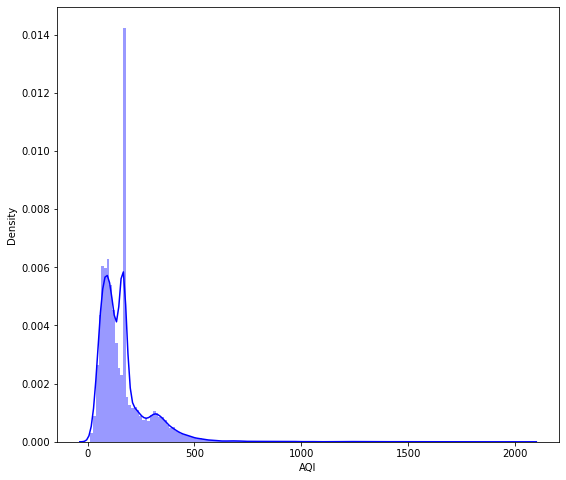

In [13]:
plt.figure(figsize=(9, 8))
sns.distplot(data['AQI'], color='b', bins=160, hist_kws={'alpha':0.4})

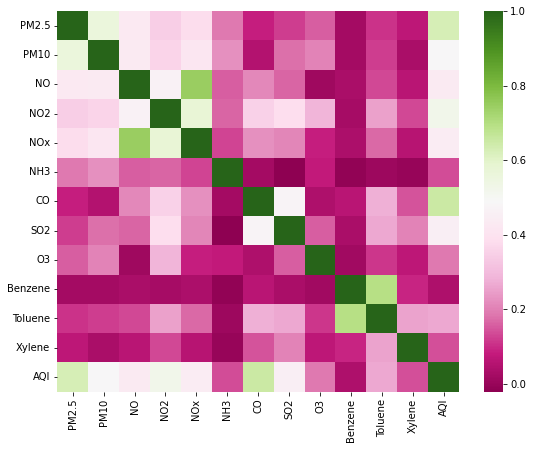

In [14]:
re = data.corr()
corr_feat = re.index
plt.figure(figsize=(9, 7))
sns.heatmap(data[corr_feat].corr(), annot=False, cmap="PiYG")
plt.savefig("heatmap")
# hm. as we can see green (corr with themselves) 1 == (postivly corr ) && 0 == neg corr

<AxesSubplot:ylabel='AQI'>

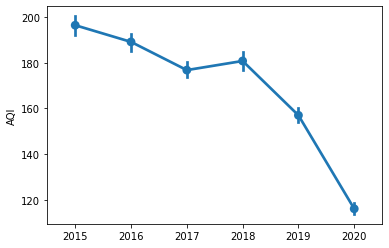

In [15]:
sns.pointplot(x=[x.strftime("%Y") for x in data.Date], y="AQI", data=data)

In [16]:
def remark(x):
  if 0 <= x <= 50: return "good"
  elif 51 <= x <= 100: return "satisfactory"
  elif 101 <= x <= 250: return "moderate"
  elif 251 <= x <= 350: return "poor"
  elif 351 <= x <= 430: return "very poor"
  else: return "severe"
    
data['remark'] = [remark(x) for x in data['AQI']]

In [17]:
data['remark']

0            moderate
1            moderate
2            moderate
3            moderate
4            moderate
             ...     
29526            good
29527    satisfactory
29528    satisfactory
29529    satisfactory
29530            good
Name: remark, Length: 29531, dtype: object

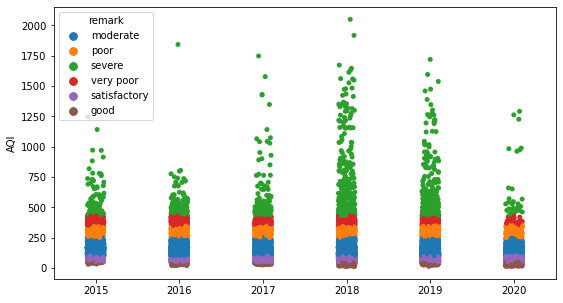

In [18]:

plt.figure(figsize=(9, 5))
sns.stripplot(x=[x.strftime("%Y") for x in data.Date], y="AQI", data=data, hue="remark")
plt.savefig("stripplot")

In [19]:
del data['remark']

In [20]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00000,0.020000,0.000000,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68000,5.500000,3.770000,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80000,16.400000,2.250000,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43000,10.140000,1.000000,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01000,18.890000,2.780000,166.463581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.000000


In [21]:
AQI_bucket

{'good': 1341,
 'satisfactory': 8224,
 'moderate': 15129,
 'poor': 2601,
 'very_poor': 1241,
 'severe': 995}

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [23]:
# Feature Scaling (conv high magnitude value to small)
# Standardisation (conv values b/w -3 & 3 more or less) 
# or Normalisation ( Conv values between 0 & 1)
# Standardisation is more prefered. 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, :] = sc.fit_transform(x_train[:, :])
x_test[:, :] = sc.fit_transform(x_test[:, :])

### [LinearRegression model.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [ ]:
# Simple Linear regressor
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

In [ ]:
y_pred = linear_regressor.predict(x_test)

In [ ]:
# https://scikit-learn.org/stable/modules/classes.html#regression-metrics
from sklearn.metrics import r2_score, mean_absolute_error
print("r2_score: ", r2_score(y_test, y_pred))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred)) # . BAD

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
sns.displot(y_test - y_pred)

### [SGDRegressor model.](https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor)

In [ ]:
from sklearn.linear_model import SGDRegressor
sdg_regressor = SGDRegressor(max_iter=6000, alpha=0.0005, tol=1e-3)
sdg_regressor.fit(x_train, y_train)

In [ ]:
y_pred = sdg_regressor.predict(x_test)

In [ ]:
# https://scikit-learn.org/stable/modules/classes.html#regression-metrics
from sklearn.metrics import r2_score
print("r2_score: ", r2_score(y_test, y_pred))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))

### [XG Boost Regressor model.](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn)

In [ ]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()

In [ ]:
# in order to find the best parameters for XGBRegressor.
# we can use grid search CV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# or randomised search CV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# define param for XGBRegressor

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

learning_rate = ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']

max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

subsample = [0.7, 0.6, 0.8]

min_child_weight = [3, 4, 5, 6, 7]

In [ ]:
param = {
  'n_estimators': n_estimators,
  'learning_rate': learning_rate,
  'max_depth': max_depth,
  'subsample': subsample,
  'min_child_weight': min_child_weight
}

In [ ]:
# scoring=r2_square error use 'r2' 
# https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
xgb_select_param = RandomizedSearchCV(estimator=xgb_regressor, 
                                      param_distributions=param,
                                      scoring='r2',
                                      n_iter=10,
                                      cv=5,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=1)

In [ ]:
# DONT train locally. use google colab.
# xgb_select_param.fit(x_train, y_train) 

In [ ]:
# xgb_select_param.best_params_
'''
for: n_iter = 10
{'learning_rate': '0.05',
'max_depth': 15,
'min_child_weight': 5,
'n_estimators': 1200,
'subsample': 0.6}
'''

In [ ]:
xgb_regressor = XGBRegressor(
  learning_rate= 0.05,
  max_depth= 15,
  min_child_weight= 5,
  n_estimators= 1200,
  subsample= 0.6
)

In [ ]:
xgb_regressor.fit(x_train, y_train)

In [ ]:
y_pred = xgb_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print("r2_score: ", r2_score(y_test, y_pred))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))

In [ ]:
# plt.scatter(y_test, y_pred)

### [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor)

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
# define param for rf model.
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

In [27]:
param = {
  'n_estimators': n_estimators,
  'max_features': max_features,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'min_samples_leaf': min_samples_leaf
}

In [28]:
# model selection.
# https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
# neg_mean_squared_error for scoring
rf_select_param = RandomizedSearchCV(estimator=rf_regressor, 
                                      param_distributions=param,
                                      scoring='neg_mean_squared_error',
                                      n_iter=10,
                                      cv=5,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=1)

In [29]:
# DONT train locally. use google colab.
# rf_select_param.fit(x_train, y_train)

In [30]:
# rf_select_param.best_params_
{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [31]:
rf_regressor = RandomForestRegressor(
  max_depth= 25,
  max_features= 'sqrt',
  min_samples_leaf= 1,
  min_samples_split= 2,
  n_estimators= 1000
)

In [32]:
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [33]:
y_pred = rf_regressor.predict(x_test)

In [34]:
from sklearn.metrics import r2_score
print("r2_score: ", r2_score(y_test, y_pred))


r2_score:  0.8792953316763155


/Users/vagrant/miniforge3/envs/batman/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


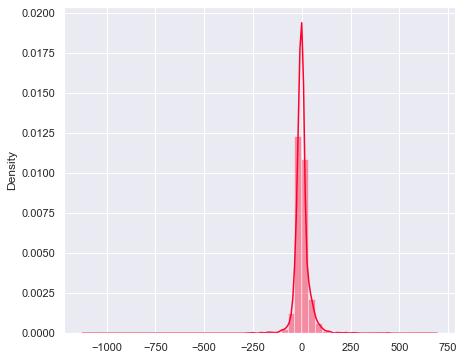

In [35]:
plt.figure(figsize=(7, 6))
sns.set_theme()
sns.set_theme(palette="prism_r")
sns.distplot(y_test - y_pred)
plt.savefig("displot_randomforestreg")

/Users/vagrant/miniforge3/envs/batman/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


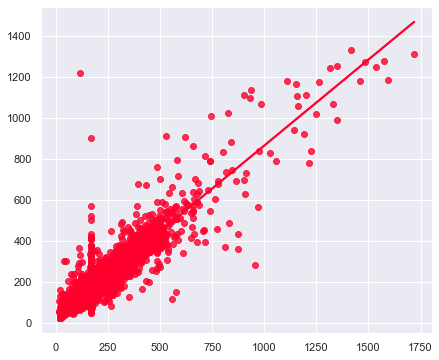

In [42]:
#plt.scatter(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.regplot(y_test, y_pred, ci=None)
plt.savefig("regplot")

### [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn-svm-svr)

In [ ]:
from sklearn.svm import SVR
svr_regressor = SVR()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# define param for svr model.
from scipy import stats
# kernel = ['linear', 'poly', 'rbf']

# degree = [int(x) for x in np.linspace(start=3, stop=30, num=6)]

# gamma = ['scale', 'auto']

# C = [float(x) for x in np.linspace(start=1, stop=15, num=8)]

# epsilon = [0.1, 0.3, 0.5, 0.6, 0.8]

C = stats.uniform(2, 10)
gamma = stats.uniform(0.1, 1)

In [ ]:
param = {
  'gamma': gamma,
  'C': C
}

In [ ]:
# model selection.
# https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
# neg_mean_squared_error for scoring
svr_select_param = RandomizedSearchCV(estimator=svr_regressor, 
                                      param_distributions=param,
                                      scoring='neg_mean_squared_error',
                                      n_iter=10,
                                      cv=5,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=1)

In [ ]:
# DONT train locally. use google colab.
# svr_select_param.fit(x_train, y_train)

In [ ]:
# svr_select_param.best_params_
{'C': 10.324426408004218, 'gamma': 0.31233911067827613}

In [ ]:
svr_regressor = SVR(C=10.324426408004218, gamma=0.31233911067827613)

In [ ]:
svr_regressor.fit(x_train, y_train)

In [ ]:
y_pred = svr_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
print("r2_score: ", r2_score(y_test, y_pred))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))

### [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn-tree-decisiontreeregressor)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
splitter = ['best', 'random']

max_depth = [1, 3, 5, 7, 9, 11, 12]

min_samples_leaf = [x for x in range(1, 11)]

min_weight_fraction_leaf = [float('%.2f' % (x)) for x in np.linspace(start=0.1, stop=1, num=10)]

max_features = ['auto','log2','sqrt', None]

max_leaf_nodes = [None , 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [ ]:
param = {
  'splitter': splitter,
  'max_depth': max_depth,
  'min_samples_leaf': min_samples_leaf,
  'min_weight_fraction_leaf': min_weight_fraction_leaf,
  'max_features': max_features,
  'max_leaf_nodes': max_leaf_nodes
}

In [ ]:
dt_select_param = GridSearchCV(
  estimator=dt_regressor,
  param_grid=param,
  scoring='neg_mean_squared_error',
  cv=3,
  verbose=3
)

In [ ]:
# dt_select_param.fit(x_train, y_train)

In [ ]:
# dt_select_param.best_params_
{'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 9,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
dt_regressor = DecisionTreeRegressor(
  max_depth= 5,
  max_features='sqrt',
  max_leaf_nodes= 10,
  min_samples_leaf= 9,
  min_weight_fraction_leaf= 0.1,
  splitter= 'best'
)

In [ ]:
dt_regressor.fit(x_train, y_train)

In [ ]:
y_pred = dt_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
print("r2_score: ", r2_score(y_test, y_pred))
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))